In [1]:
from ad99 import AlexanderDunkerton1999
import numpy as np 
import matplotlib.pyplot as plt 
import xarray as xr 
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [2]:
GCLOUD_ERA5 = 'gs://gcp-public-data-arco-era5/ar/full_37-1h-0p25deg-chunk-1.zarr-v3'

In [3]:
loon_mask = xr.open_dataset('data/loon_masks.nc')
loon_mask['lon'] = (loon_mask.lon + 360) % 360 
loon_mask=loon_mask.sortby('lon')

In [4]:
ds = xr.open_dataset(GCLOUD_ERA5,engine='zarr',chunks={},
    storage_options=dict(token='anon'),)

In [5]:
loon_mask_interp = loon_mask.interp(lat=ds.latitude.values,lon=ds.longitude.values,method='nearest')
loon_mask_interp = loon_mask_interp.rename({'lat':'latitude','lon':'longitude'})

In [6]:
ds_subset = ds[['u_component_of_wind','v_component_of_wind','temperature','geopotential']]

In [7]:
ds_subset = ds_subset.sel(time=slice(ds.valid_time_start,ds.valid_time_stop))

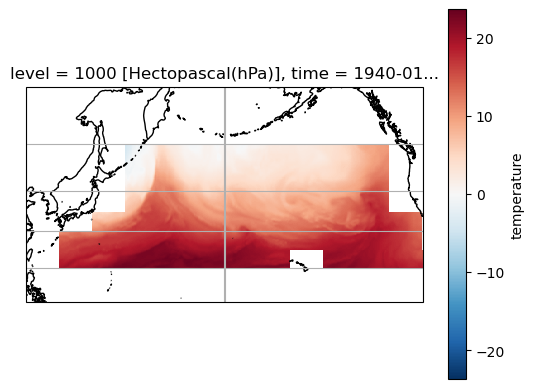

In [8]:
ax = plt.axes(projection=ccrs.Mercator(central_longitude=180))
(ds_subset.temperature.isel(time=10,level=-1).where(loon_mask_interp.extratropical_pacific) - 273.15).plot.pcolormesh(ax=ax,transform=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
ax.set_extent([120, 240, 10, 60], crs=ccrs.PlateCarree())


## get fields

In [10]:
from constants import GRAV,C_P
BFLIM = 3e-5

us = ds_subset.u_component_of_wind
vs = ds_subset.v_component_of_wind
height = ds_subset.geopotential/GRAV

MemoryError: Unable to allocate 104. TiB for an array with shape (746544, 37, 721, 1440) and data type float32